In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
gold_data = pd.read_csv('/content/drive/MyDrive/Gold Project/Models/Gold Prediction/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [8]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract year and month as separate columns
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month

# Display the updated DataFrame
print(gold_data.head())

        Date          SPX        GLD        USO     SLV   EUR/USD  Year  Month
0 2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692  2008      1
1 2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491  2008      1
2 2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492  2008      1
3 2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299  2008      1
4 2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099  2008      1


In [9]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653,2012.724891,6.329258
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047,2008.000000,1.000000
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313,2010.000000,3.000000
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297,2013.000000,6.000000
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971,2015.000000,10.000000
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798,2018.000000,12.000000
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547,2.993271,3.591149


In [10]:
gold_data = gold_data.drop(['Date'], axis=1)

In [11]:
correlation = gold_data.corr()

<Axes: >

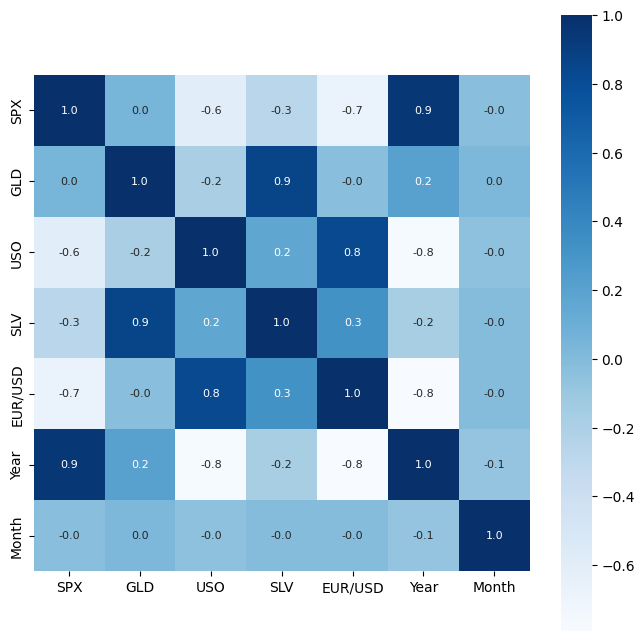

In [12]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Name: GLD, dtype: float64


<ipython-input-14-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

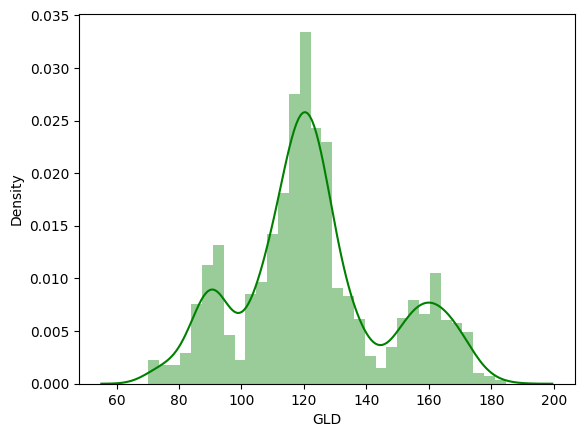

In [14]:
sns.distplot(gold_data['GLD'],color='green')

In [15]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.25659898  82.61949996 115.73939971 127.57930074 120.65550078
 154.83069707 151.03209876 126.03380075 117.76879844 126.07660087
 116.05040133 169.19830101 141.65339801 167.78489761 115.36060025
 117.4334008  135.26130126 171.05360244 159.78650265 172.37250034
 155.1105004  122.96619956 174.06060071 157.23050216 125.15200054
  93.64249983  76.82030032 119.32130071 119.16759947 167.57690059
  88.09600087 125.26169968  91.79500062 117.7183003  121.08699991
 135.77810049 115.43180094 114.50350062 140.76259902 108.15040095
 105.73280268  87.13839794 126.528801   117.68380052 154.88009921
 119.99139969 108.49119984 107.96609883  92.8730001  127.08929771
  75.14310039 114.09369974 120.83559971 111.38719938 118.85389889
 120.99539872 160.2137997  175.36720127 146.34209623  86.61049924
  93.92989999  86.9660987   90.30490065 119.0160007  126.39310067
 127.77129963 171.91570072 122.29839937 117.90599839  97.55170049
 168.64510071 142.33489892 132.42390213 120.7823008  123.56999899
 119.44710

In [21]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9952153316230412


In [22]:
Y_test = list(Y_test)

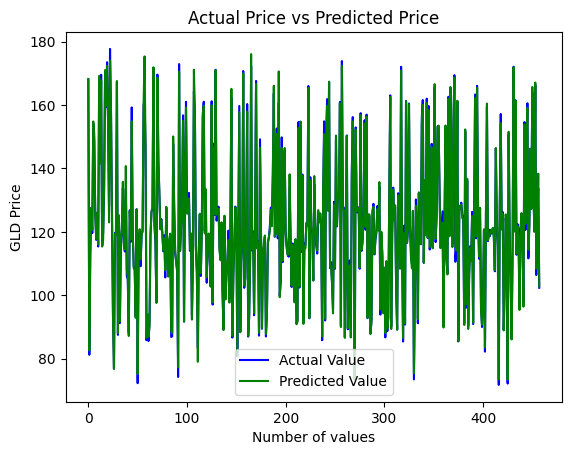

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [24]:
import joblib
joblib.dump(regressor, 'gold_prediction_new.joblib')

['gold_prediction_new.joblib']

In [25]:
def predict_GLD(spx, uso, slv, eur_usd, year, month):
    """
    Predicts the GLD value based on input parameters.

    Parameters:
    spx (float): S&P 500 index value
    uso (float): USO price
    slv (float): SLV price
    eur_usd (float): EUR/USD exchange rate
    year (int): Year
    month (int): Month

    Returns:
    float: Predicted GLD value
    """
    input_data = np.array([[spx, uso, slv, eur_usd, year, month]])
    predicted_gld = regressor.predict(input_data)
    return predicted_gld[0]


In [26]:
predicted_value = predict_GLD(spx=3000, uso=45, slv=15, eur_usd=1.2, year=2029, month=5)
print(f"Predicted GLD value: {predicted_value}")

Predicted GLD value: 119.98519984000013


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [28]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
 5   Year     2290 non-null   int32  
 6   Month    2290 non-null   int32  
dtypes: float64(5), int32(2)
memory usage: 107.5 KB


In [29]:
features = ['SPX', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month']
target = 'GLD'

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(gold_data[features + [target]])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features + [target])


In [31]:
def create_sequences(data, target_column, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_column])
    return np.array(X), np.array(y)

# Define time step window
time_steps = 30  # Use past 30 days' data to predict the next day's price

# Prepare sequences
X, y = create_sequences(df_scaled, target_column='GLD', time_steps=time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Check shape
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (1808, 30, 7), Test shape: (452, 30, 7)


In [32]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output layer for predicting GLD
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,101 (129.30 KB)

 Trainable params: 33,101 (129.30 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train LSTM Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0524 - val_loss: 0.0020
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0029 - val_loss: 9.6893e-04
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0023 - val_loss: 8.3187e-04
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0016 - val_loss: 5.4307e-04
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 12/50
113/113 ━━━━━━━━━

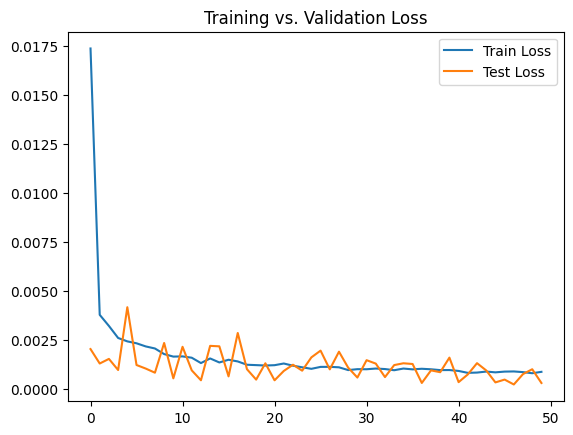

In [34]:
# Plot Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


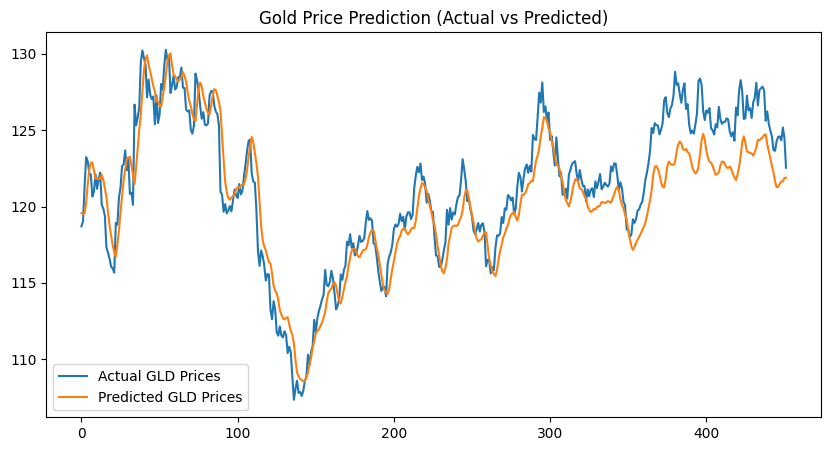

In [35]:
# Predict on test data
y_pred = model.predict(X_test)

# Convert back to original scale
scaler_gld = MinMaxScaler()
scaler_gld.fit(gold_data[['GLD']])
y_pred_original = scaler_gld.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_gld.inverse_transform(y_test.reshape(-1, 1))

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_original, label="Actual GLD Prices")
plt.plot(y_pred_original, label="Predicted GLD Prices")
plt.legend()
plt.title("Gold Price Prediction (Actual vs Predicted)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━

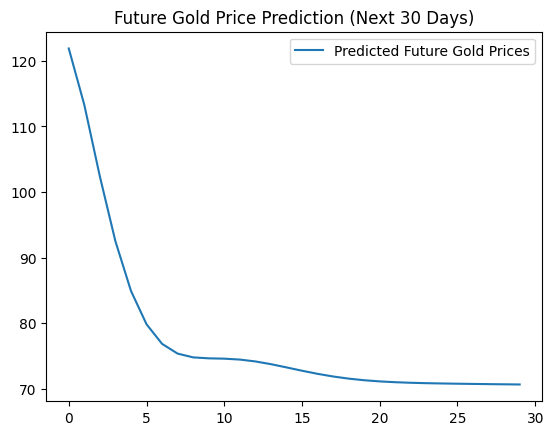

In [45]:
def predict_future_prices(model, last_30_days, future_days=30):
    predictions = []
    current_input = last_30_days.copy()

    for _ in range(future_days):
        pred = model.predict(current_input.reshape(1, time_steps, X_train.shape[2]))
        predictions.append(pred[0, 0])

        # Update sequence with new prediction
        current_input = np.append(current_input[1:], [[pred[0, 0]] + [0]*(X_train.shape[2]-1)], axis=0)

    return np.array(predictions)

# Take last 30 days as input
last_30_days = X_test[-1]

# Predict future prices
future_predictions = predict_future_prices(model, last_30_days, future_days=30)

# Convert back to original scale
future_predictions_original = scaler_gld.inverse_transform(future_predictions.reshape(-1, 1))

# Plot future predictions
plt.plot(future_predictions_original, label="Predicted Future Gold Prices")
plt.legend()
plt.title("Future Gold Price Prediction (Next 30 Days)")
plt.show()


In [37]:
model.save('gold_price_lstm_model.h5')
